In [59]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [61]:
colorset = ['#763C87','#1FA2F4','#0569CE','#F48C36','#E54028']
greens = ['#37535e', '#3b748a', '#4095b5', '#52aec9', '#72bfc4', '#93d0bf']

mpl.rcParams.update({
'backend': 'MacOSX',
'text.usetex': 'false',
'font.family': 'Myriad Pro',
'font.size': 18, 
'figure.subplot.hspace': .4,
'figure.subplot.bottom': 0.125, 
'savefig.dpi': 600,
'savefig.format': 'pdf', 
'pdf.fonttype': 42,
'figure.edgecolor': (1, 1, 1, 0), 
'figure.facecolor': (1, 1, 1, 0), 
'figure.figsize': (15.0, 10.0),
'font.weight': 'bold',
'axes.labelweight': 'bold',
'axes.titlesize': 36,
'lines.markersize': 11.200000000000001,
 'ytick.major.width': 1.6,
 'xtick.major.width': 1.6,
 'lines.markeredgewidth': 0.0,
 'xtick.major.pad': 11.200000000000001,
 'ytick.minor.width': 0.8,
 'grid.linewidth': 1.6,
 'lines.linewidth': 2.8000000000000003,
 'ytick.major.pad': 11.200000000000001,
})

In [62]:
data = pd.io.parsers.read_csv('data/mRNA-Flow-CD69-IRF4.csv', 
                                    sep=',', 
                                    header=0, index_col=0)

# Remove Mean and SD rows
data = data[data['SampleID'].isnull() == False]

# Remove PMA positive controls
data = data[data['SampleID'].str[:3] != 'PMA']

In [63]:
data.tail()

,SampleID,Lymphocytes/CD4+ | Geometric Mean (Comp-APC-A),Lymphocytes/CD4+/CD69+ | Freq. of Parent (%),Lymphocytes/CD4+/CD69+ | Geometric Mean (Comp-APC-A),Lymphocytes/CD4+/CD69- | Freq. of Parent (%),Lymphocytes/CD4+/CD69- | Geometric Mean (Comp-APC-A),Unnamed: 7
Specimen_001_4b Irf4.fcs,PCC-0.1uM-2,760,47.1,1381,52.9,361,NaN
Specimen_001_5a Irf4.fcs,PCC-10uM-1,1238,70.5,1817,29.5,386,NaN
Specimen_001_5a cd69.fcs,PCC-10uM-1,968,65.5,1355,34.5,430,NaN
Specimen_001_5b Cd69.fcs,PCC-10uM-2,830,59.2,1155,40.8,455,NaN
Specimen_001_5b Irf4.fcs,PCC-10uM-2,1045,67.4,1504,32.6,395,NaN


In [64]:
# Collapse numbered tube names
data['Probe'] = data.index.str[-8:-4].str.title()
data['TUBE NAME'] = data['SampleID'].str[:-2]
data['Probe']

Specimen_001_1a Cd69.fcs    Cd69
Specimen_001_1a Irf4.fcs    Irf4
Specimen_001_1b Cd69.fcs    Cd69
Specimen_001_2a Cd69.fcs    Cd69
Specimen_001_2a Irf4.fcs    Irf4
Specimen_001_2b Cd69.fcs    Cd69
Specimen_001_3a Cd69.fcs    Cd69
Specimen_001_3a Irf4.fcs    Irf4
Specimen_001_3b Cd69.fcs    Cd69
Specimen_001_4a Cd69.fcs    Cd69
Specimen_001_4a Irf4.fcs    Irf4
Specimen_001_4b Cd69.fcs    Cd69
Specimen_001_4b Irf4.fcs    Irf4
Specimen_001_5a Irf4.fcs    Irf4
Specimen_001_5a cd69.fcs    Cd69
Specimen_001_5b Cd69.fcs    Cd69
Specimen_001_5b Irf4.fcs    Irf4
Name: Probe, dtype: object

In [65]:
# I want a particular ordering of columns.
col_order = data['TUBE NAME'].unique().tolist()

labels = [s.replace('-', ' ').replace('_', '.') for s in col_order]
col_order, labels

(['No-Peptide', 'K99A-10uM', 'K99A-100uM', 'PCC-0.1uM', 'PCC-10uM'],
 ['No Peptide', 'K99A 10uM', 'K99A 100uM', 'PCC 0.1uM', 'PCC 10uM'])

In [66]:
ab = 'Cd69'
col_name = 'Lymphocytes/CD4+ | Geometric Mean (Comp-APC-A)'

In [67]:
# Group by name
subdata = data[data['Probe'] == ab]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order]

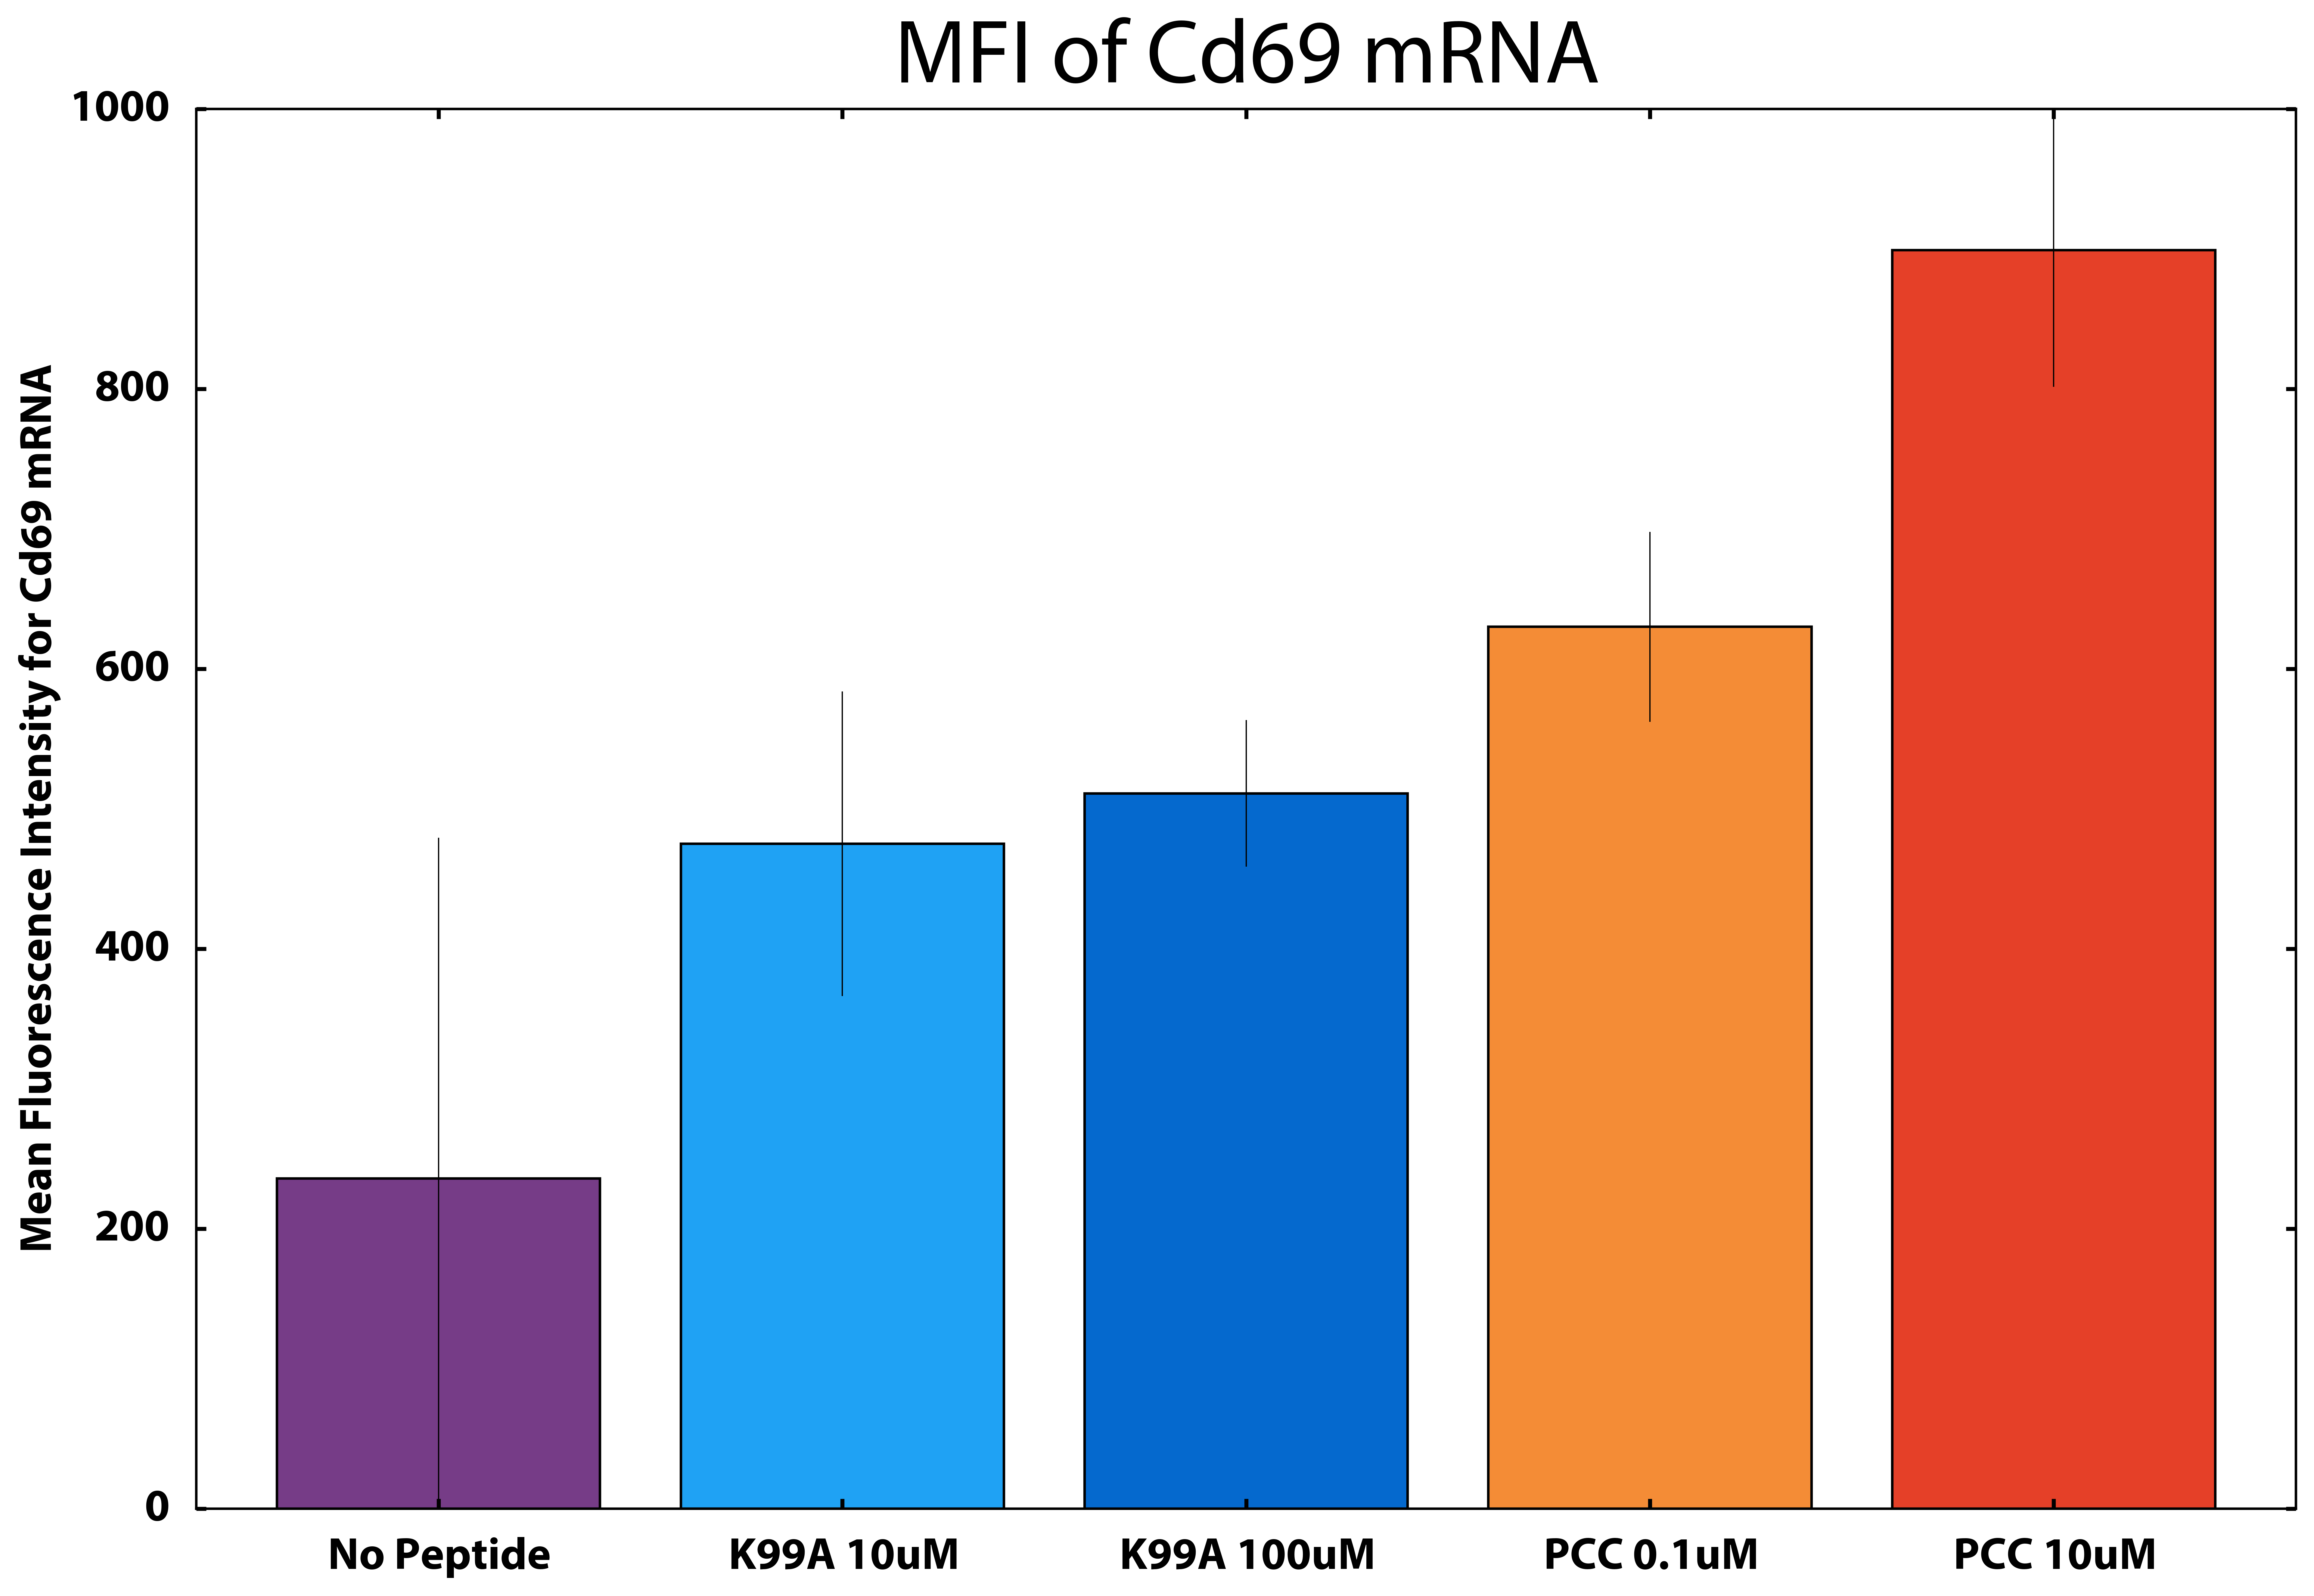

In [68]:
x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset)
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Mean Fluorescence Intensity for {} mRNA'.format(ab))

plt.xticks([x + .6 for x in x_range], labels)

plt.ylim([0, plt.ylim()[1]])

title = 'MFI of {} mRNA'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

In [58]:
from scipy.stats import ttest_ind


pairs = [('PCC-10uM','PCC-0.1uM'), ('PCC-10uM','No-Peptide')]

for x, y in pairs:
    t, p = ttest_ind(subdata[subdata['TUBE NAME'] == x][col_name], 
                     subdata[subdata['TUBE NAME'] == y][col_name])
    print(x, 'v', y, '\t', p)

PCC-10uM v PCC-0.1uM 	 0.0853249752776
PCC-10uM v No-Peptide 	 0.0700695948361


In [52]:
ab = 'Irf4'
col_name = 'Lymphocytes/CD4+ | Geometric Mean (Comp-APC-A)'

In [53]:
# Group by name
subdata = data[data['Probe'] == ab]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order]

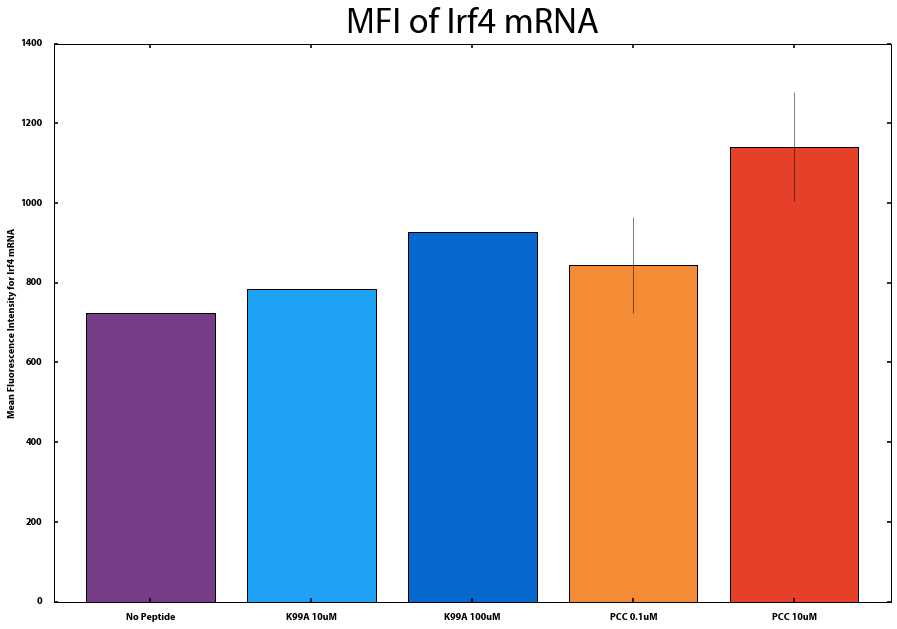

In [36]:
x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset)
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Mean Fluorescence Intensity for {} mRNA'.format(ab))

plt.xticks([x + .6 for x in x_range], labels)

plt.ylim([0, plt.ylim()[1]])

title = 'MFI of {} mRNA'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

In [54]:
from scipy.stats import ttest_ind


pairs = [('PCC-10uM','PCC-0.1uM'), ('PCC-10uM','No-Peptide')]

for x, y in pairs:
    t, p = ttest_ind(subdata[subdata['TUBE NAME'] == x][col_name], 
                     subdata[subdata['TUBE NAME'] == y][col_name])
    print(x, 'v', y, '\t', p)

PCC-10uM v PCC-0.1uM 	 0.147575757425
PCC-10uM v No-Peptide 	 nan


/Applications/anaconda/lib/python3.4/site-packages/numpy/core/_methods.py:83: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


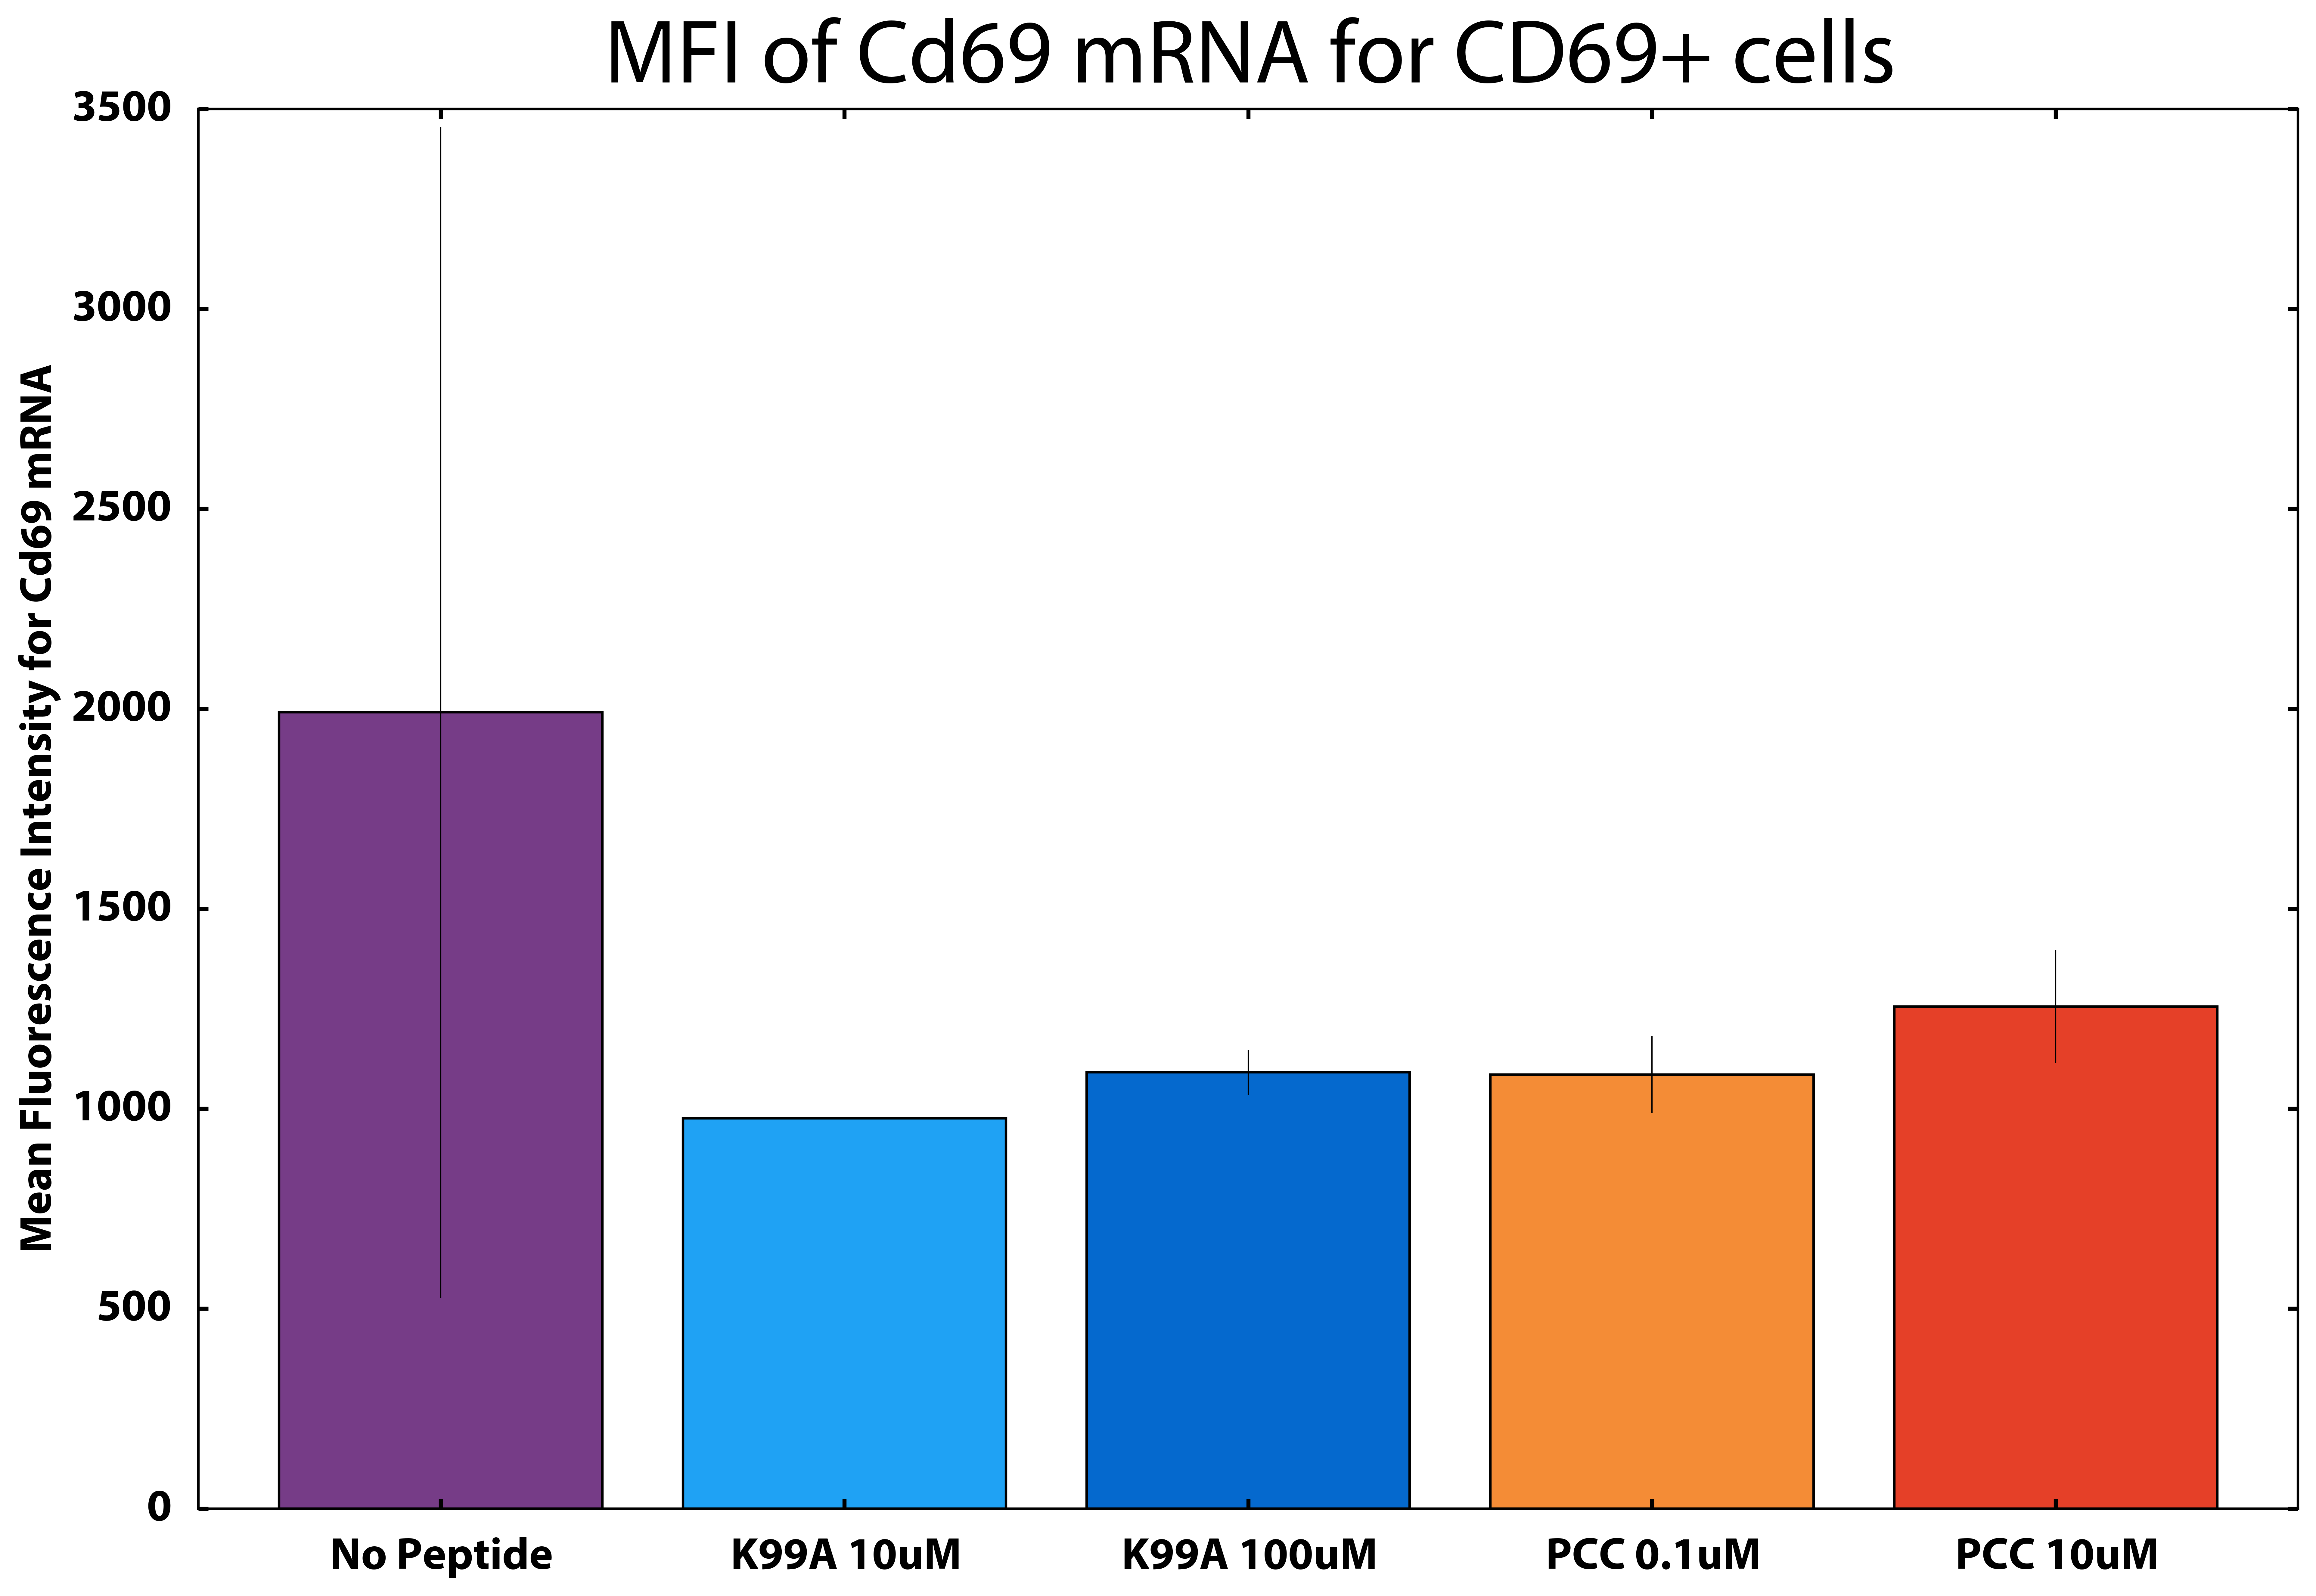

In [69]:
ab = 'Cd69'
col_name = 'Lymphocytes/CD4+/CD69+ | Geometric Mean (Comp-APC-A)'
# Group by name
subdata = data[data['Probe'] == ab]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order]


x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset)
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Mean Fluorescence Intensity for {} mRNA'.format(ab))

plt.xticks([x + .6 for x in x_range], labels)

plt.ylim([0, plt.ylim()[1]])

title = 'MFI of {} mRNA for CD69+ cells'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

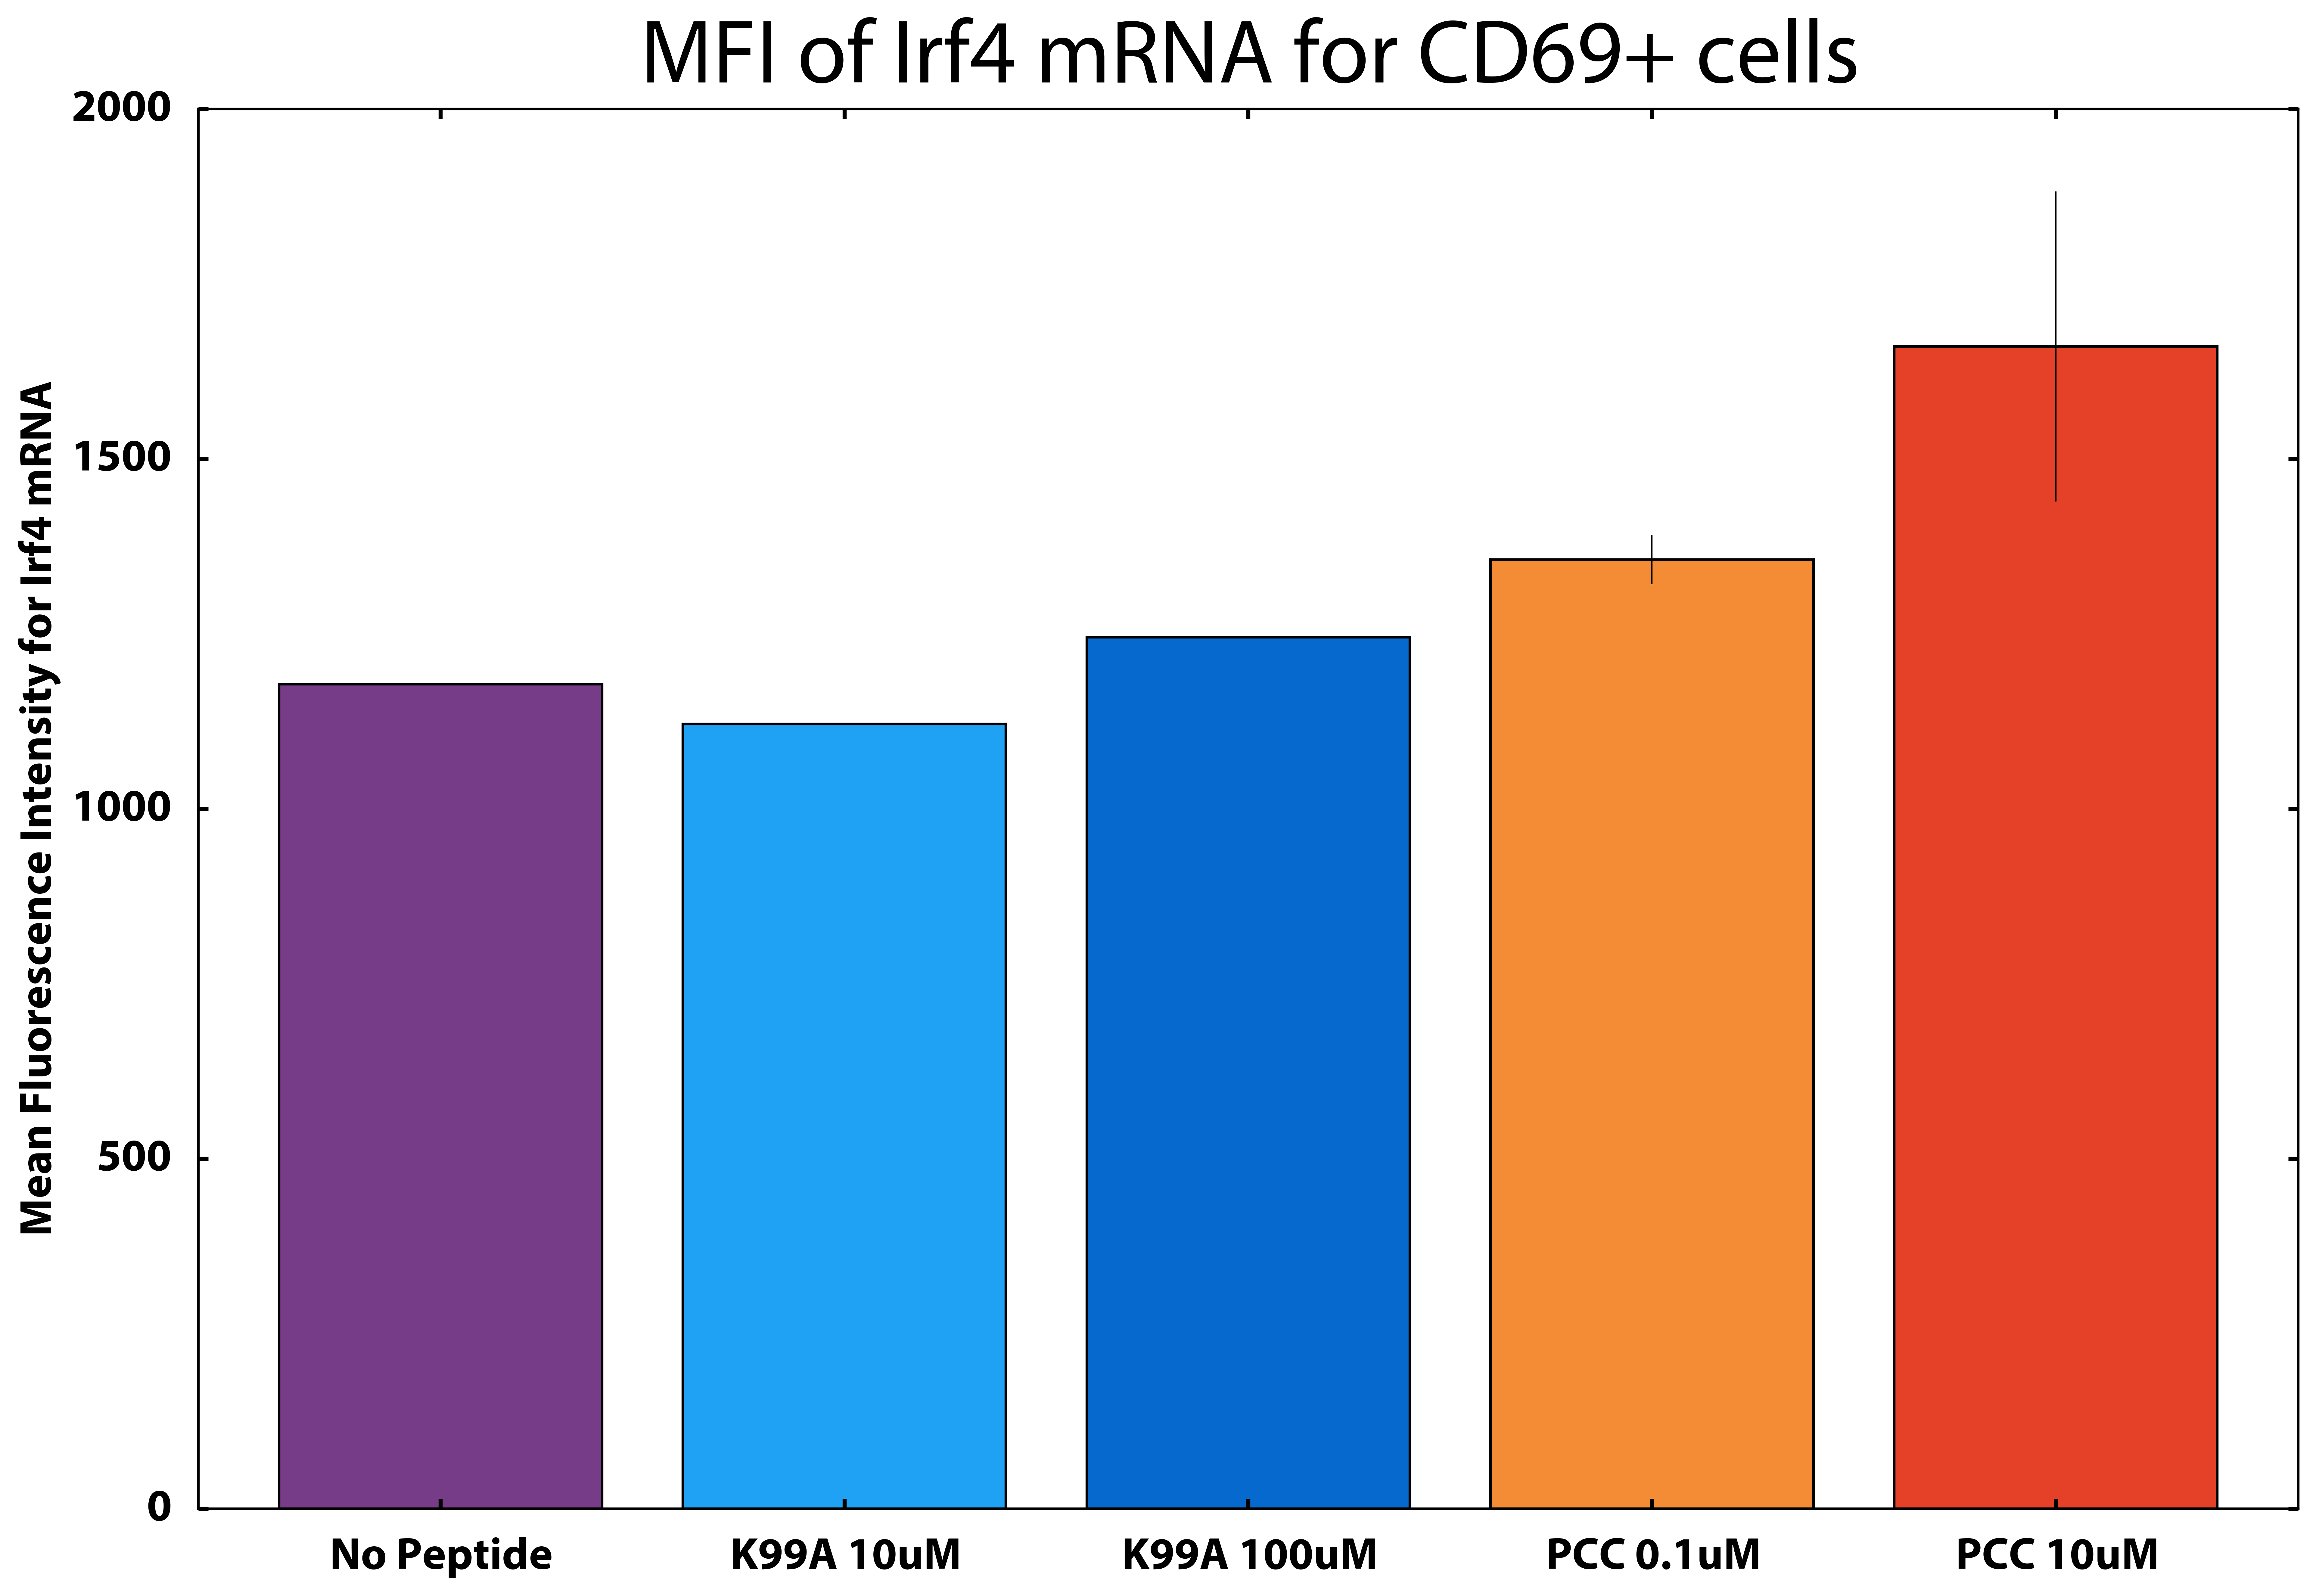

In [74]:
ab = 'Irf4'
col_name = 'Lymphocytes/CD4+/CD69+ | Geometric Mean (Comp-APC-A)'
# Group by name
subdata = data[data['Probe'] == ab]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order]


x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset)
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Mean Fluorescence Intensity for {} mRNA'.format(ab))

plt.xticks([x + .6 for x in x_range], labels)

plt.ylim([0, plt.ylim()[1]])

title = 'MFI of {} mRNA for CD69+ cells'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


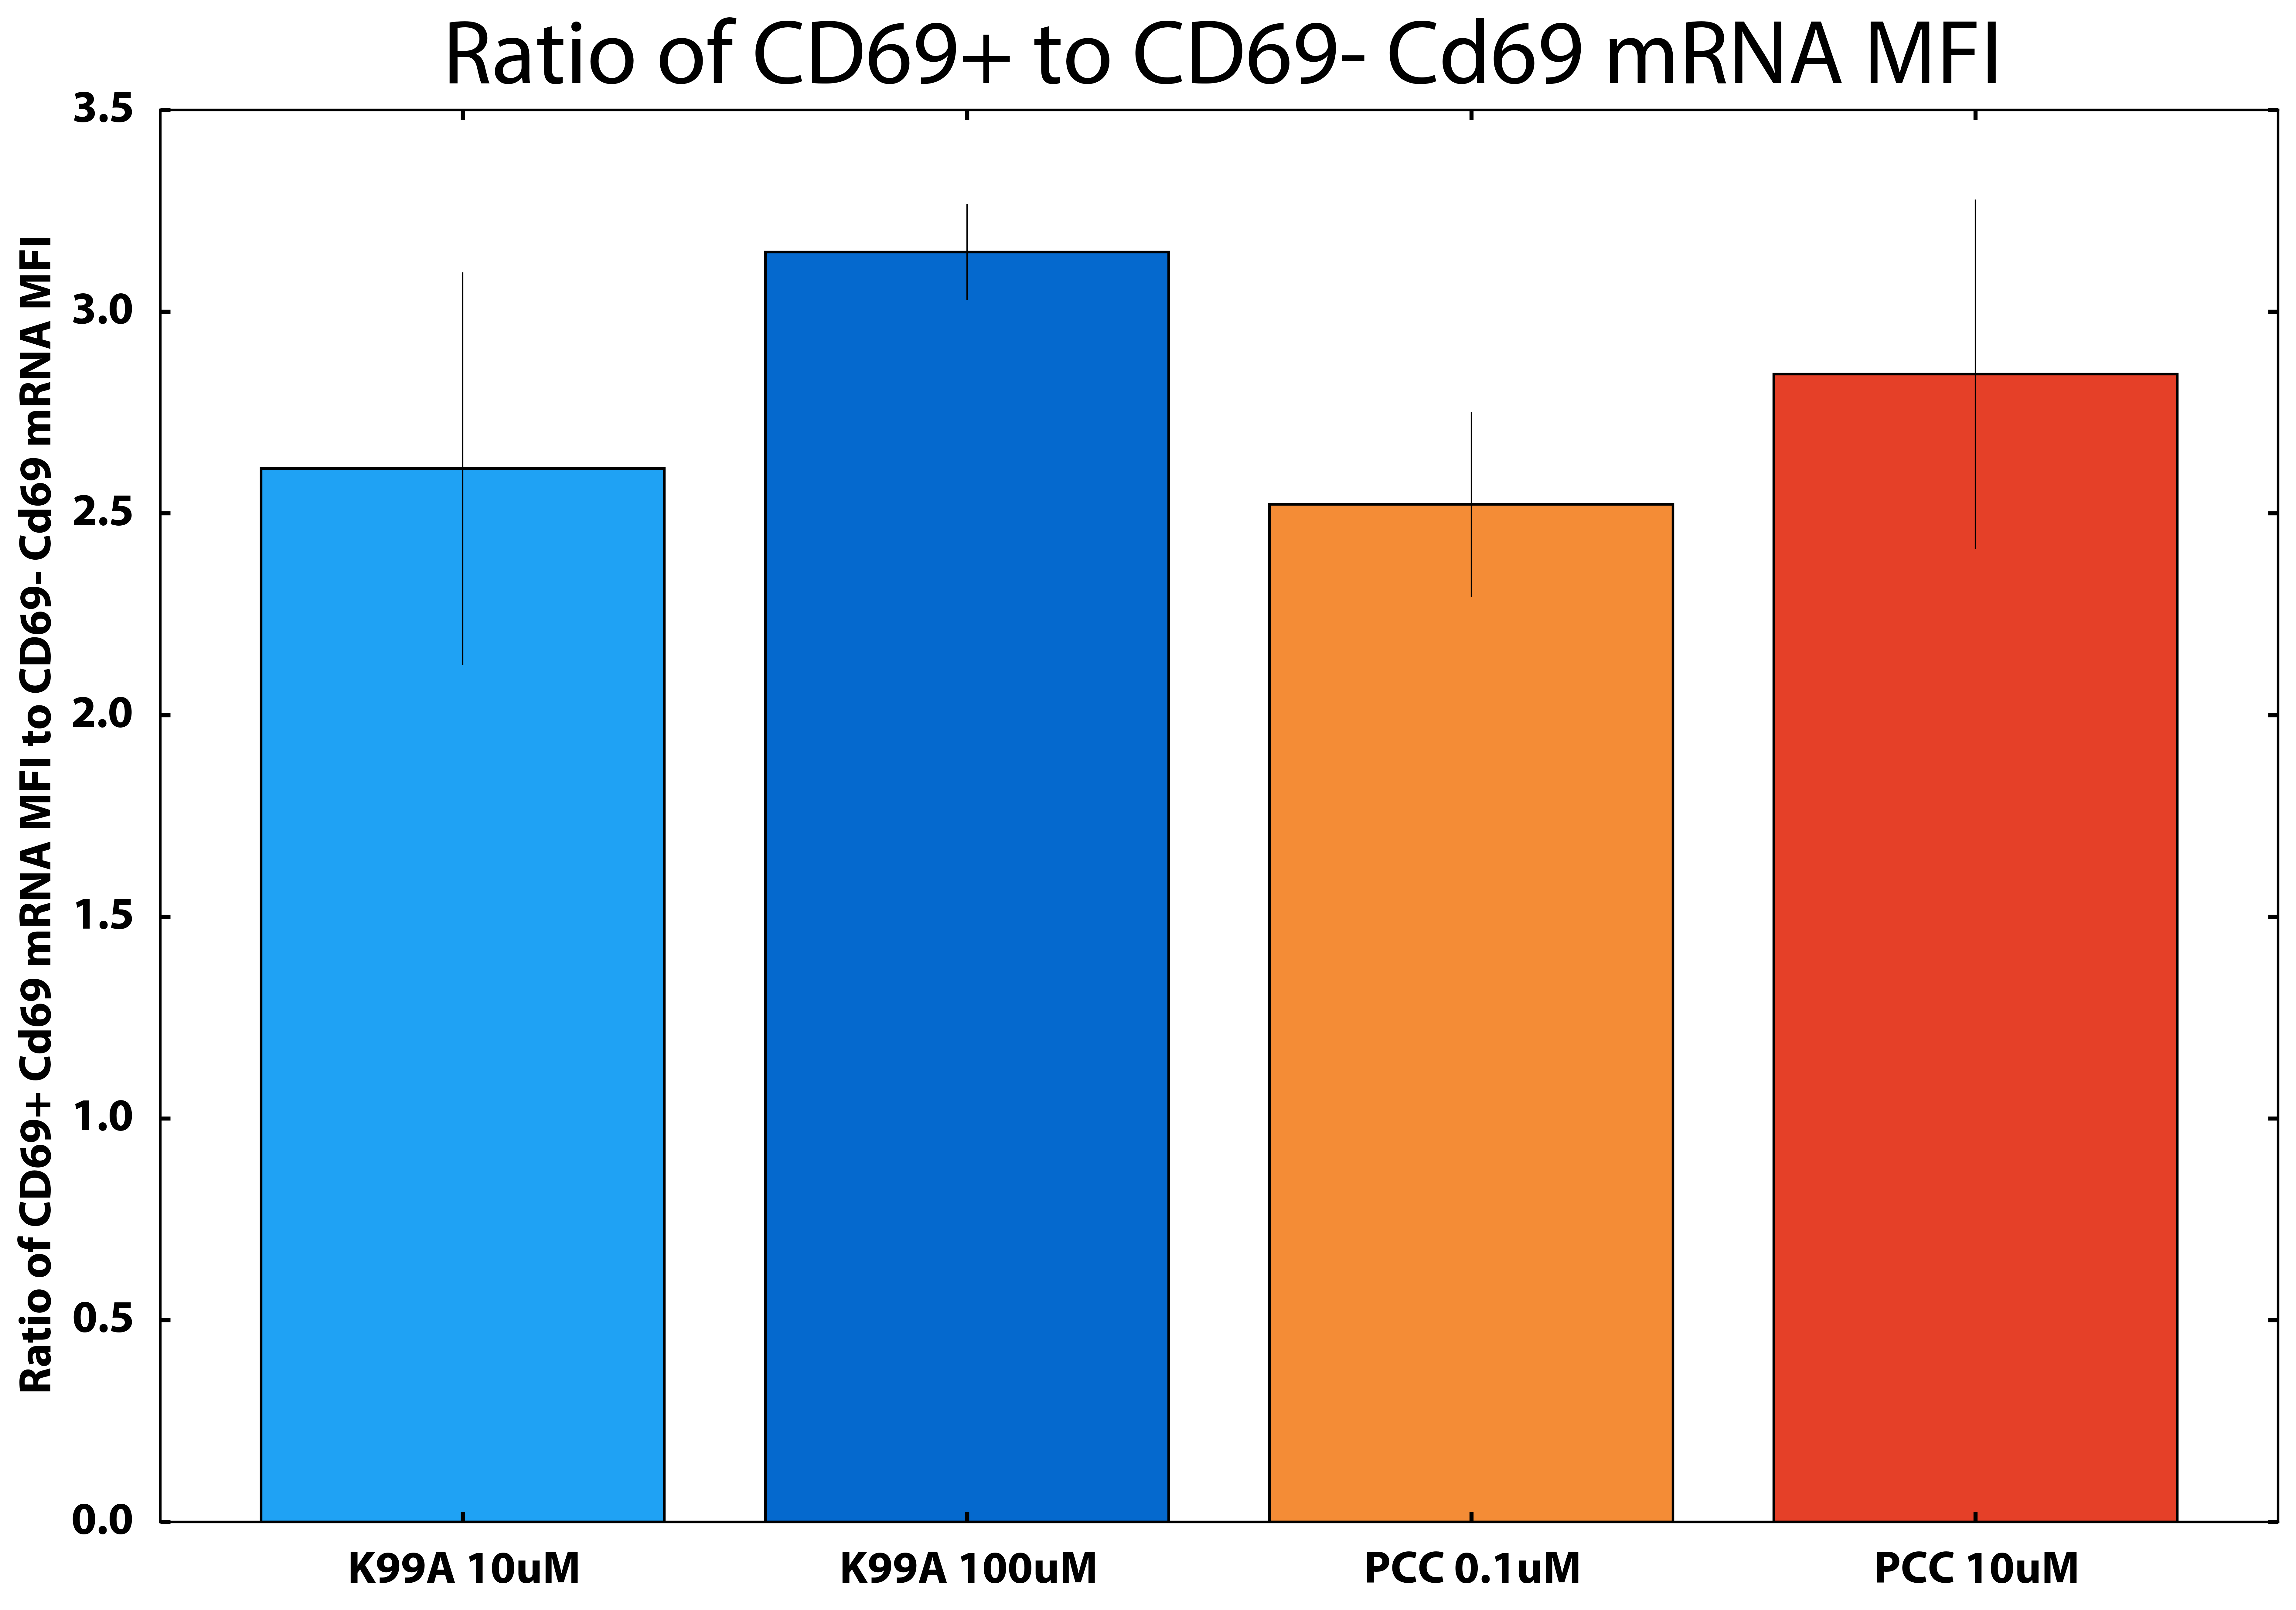

In [76]:
# Plot the ratios
ab = 'Cd69'
col_name_1 = 'Lymphocytes/CD4+/CD69+ | Geometric Mean (Comp-APC-A)'
col_name_2 = 'Lymphocytes/CD4+/CD69- | Geometric Mean (Comp-APC-A)'
col_name = 'ratio'

# Group by name
subdata = data[data['Probe'] == ab]
subdata[col_name] = subdata[col_name_1]/subdata[col_name_2]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order[1:]]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order[1:]]


x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset[1:])
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Ratio of CD69+ {} mRNA MFI to CD69- {} mRNA MFI'.format(ab, ab))

plt.xticks([x + .6 for x in x_range], labels[1:])

plt.ylim([0, plt.ylim()[1]])

title = 'Ratio of CD69+ to CD69- {} mRNA MFI'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')

/Applications/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


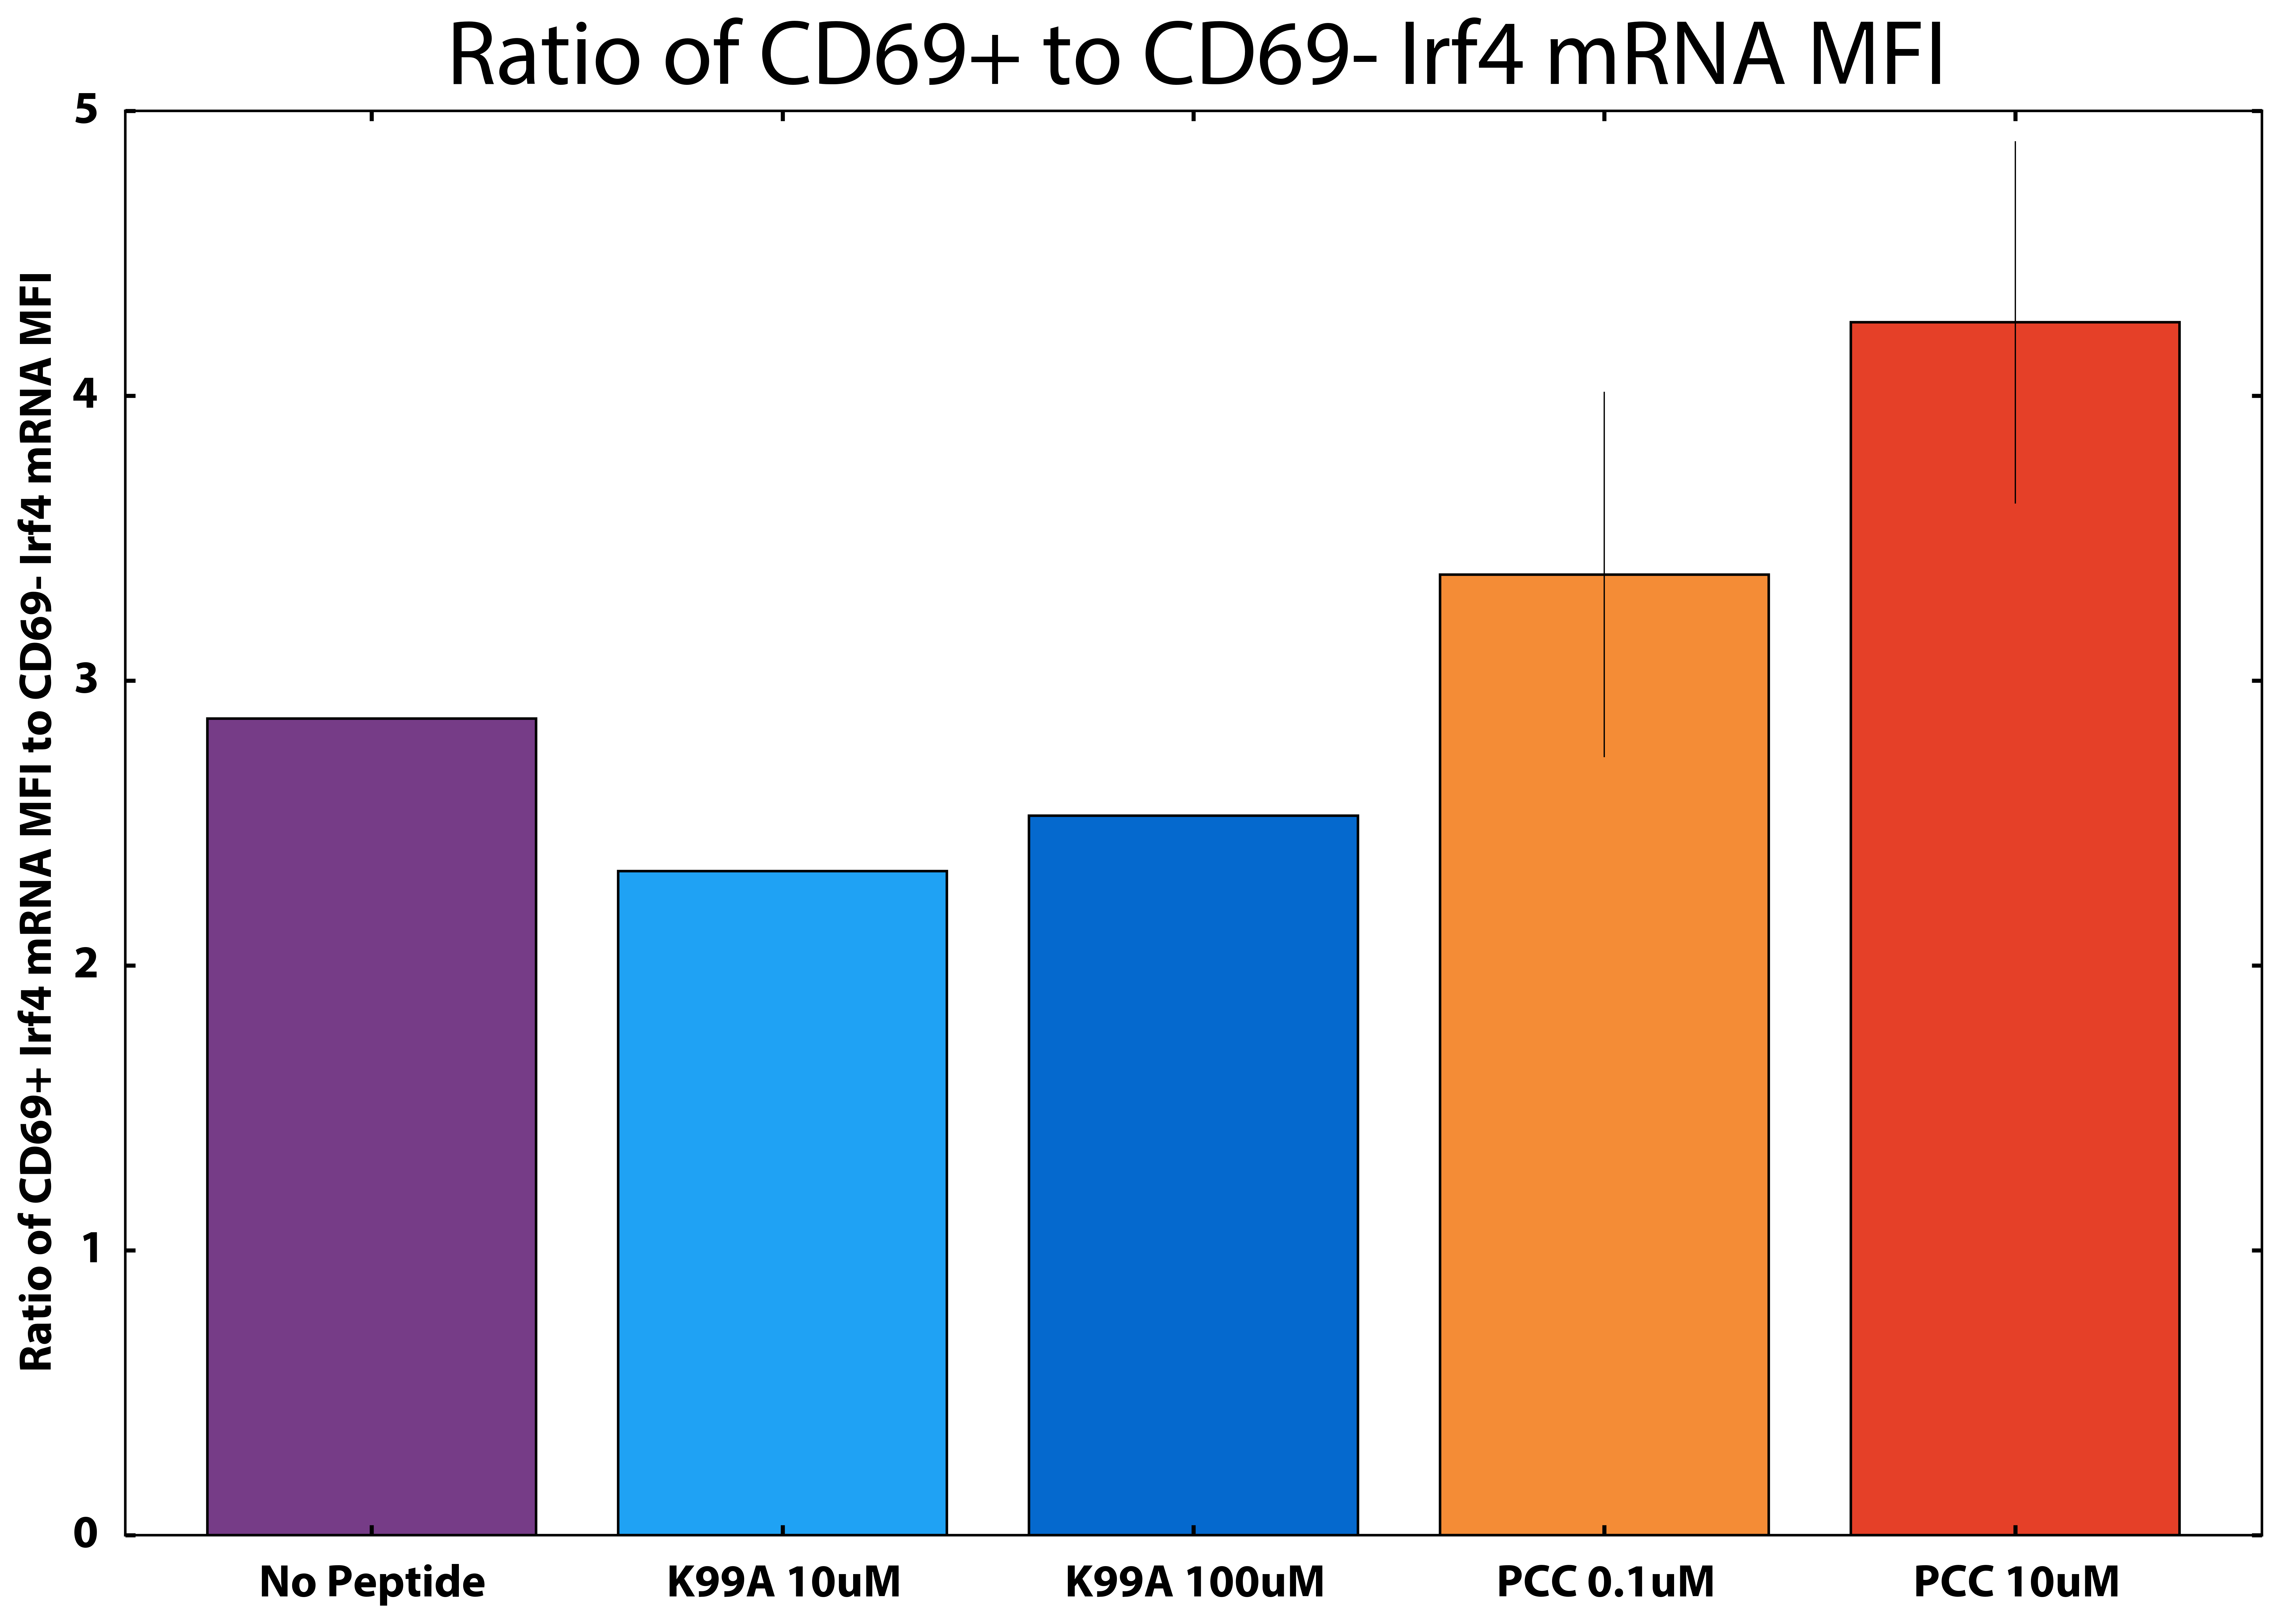

In [79]:
# Plot the ratios
ab = 'Irf4'
col_name_1 = 'Lymphocytes/CD4+/CD69+ | Geometric Mean (Comp-APC-A)'
col_name_2 = 'Lymphocytes/CD4+/CD69- | Geometric Mean (Comp-APC-A)'
col_name = 'ratio'

# Group by name
subdata = data[data['Probe'] == ab]
subdata[col_name] = subdata[col_name_1]/subdata[col_name_2]
means = subdata.groupby(by='TUBE NAME')[col_name].mean()[col_order]
stddev = subdata.groupby(by='TUBE NAME')[col_name].std()[col_order]


x_range = range(0, len(means))
plt.figure(figsize=[15, 10])

plt.bar([x + .2 for x in x_range], means, color=colorset)
plt.errorbar([x + .6 for x in x_range], means, linewidth=0,
        yerr=stddev, ecolor='black', elinewidth=.5)
plt.xlim([0, len(means) + .2])
plt.ylabel('Ratio of CD69+ {} mRNA MFI to CD69- {} mRNA MFI'.format(ab, ab))

plt.xticks([x + .6 for x in x_range], labels)

plt.ylim([0, plt.ylim()[1]])

title = 'Ratio of CD69+ to CD69- {} mRNA MFI'.format(ab)
plt.title(title, y=1.01)
plt.savefig('figures/{}'.format(title.replace(' ', '_')), bbox_inches='tight')